In [1]:
import sys
import os
import time

In [2]:
# include path to our library
cwd = os.getcwd()
dir_path = os.path.dirname(os.path.realpath(cwd))
sys.path.append(dir_path)
time.sleep(2)

In [3]:
dir_path
%cd $dir_path
!ls

/home/sataucuri/merged_git/track-ml
compiled		   logs		       run_tests.sh
config_cnn.json		   main_inference.py   run_trains2.sh
config_default.json	   main_mlp.py	       run_trains3.sh
config_lstm_2.json	   main_train.py       run_trains.sh
config_lstm_900.json	   notebooks	       script_ency_dataset.py
config_lstm_for_test.json  old		       script_generate_dist.py
config_lstm.json	   output	       sensor_labels.html
config_rnn.json		   prediction-img.png  short_dataset.py
core			   README.md	       tmp
dataset			   results
env.yml			   run_tests1.sh


In [4]:
import argparse
import json

from sklearn.model_selection import train_test_split

from core.utils.metrics import *
from core.utils.utils import *
from core.data.data_loader import *

In [6]:
# load some configurations configurations of model and others
configs = json.load(open('config_lstm.json', 'r'))
output_path = configs['paths']['save_dir']
output_logs = configs['paths']['log_dir']

if os.path.isdir(output_path) == False:
    os.mkdir(output_path)

if os.path.isdir(output_logs) == False:
    os.mkdir(output_logs)        

time_steps =  configs['model']['layers'][0]['input_timesteps']  # the number of points or hits
num_features = configs['model']['layers'][0]['input_features']  # the number of features of each hits
split_data = configs['data']['train_split']  # the number of features of each hits
cylindrical = configs['data']['cylindrical']  # set to polar or cartesian coordenates
#cylindrical = False
normalise = configs['data']['normalise'] 
num_hits = configs['data']['num_hits']

print('OK reading of json file')


OK reading of json file


In [7]:
# reading path of data
path = configs['data']['filename']
#path = '/data/track-ml/eramia/dataset/phi025-025_eta025-025_train1_lasthit_20200219.csv'
path = '/data/track-ml/eramia/dataset/eta_0.0-1.0_phi_0.0-1.0.csv'

# external
path = '/data/track-ml/eramia/dataset/eta_n0.5-0.5_phi_ninf-pinf.csv'
path

'/data/track-ml/eramia/dataset/eta_n0.5-0.5_phi_ninf-pinf.csv'

In [8]:
cylindrical = False
data = Dataset(path, split_data, cylindrical, num_hits, KindNormalization.Zscore)
# divimos 

[Data] Data loaded from  /data/track-ml/eramia/dataset/eta_n0.5-0.5_phi_ninf-pinf.csv
[Data] Data set shape  (30000, 30)
[Data] Data train shape  (24000, 30)
[Data] Data test shape  (6000, 30)
[Data] Data coordinates  xyz


In [ ]:
X_train, y_train = data.get_training_data(n_hit_in=time_steps, n_hit_out=1,
                                 n_features=num_features, normalise=False)


#X_train = X_train.iloc[:,]
#y_test = y_test[0:1000]
print(X_train.shape)
print(y_train.shape)


In [9]:
#separamos as layers
layer_1  = data.data.iloc[:, 0:3]
layer_2  = data.data.iloc[:, 3:6]
layer_3  = data.data.iloc[:, 6:9]
layer_4  = data.data.iloc[:, 9:12]
layer_5 = data.data.iloc[:, 12:15]
layer_6 = data.data.iloc[:, 15:18]
layer_7 = data.data.iloc[:, 18:21]
layer_8 = data.data.iloc[:, 21:24]
layer_9 = data.data.iloc[:, 24:27]
layer_10 = data.data.iloc[:, 27:30]

#layer_1  = data.data.iloc[0:5000, 0:3]
#layer_2  = data.data.iloc[0:5000, 3:6]
#layer_3  = data.data.iloc[0:5000, 6:9]
#layer_4  = data.data.iloc[0:5000, 9:12]
#layer_5 = data.data.iloc[0:5000, 12:15]
#layer_6 = data.data.iloc[0:5000, 15:18]
#layer_7 = data.data.iloc[0:5000, 18:21]
#layer_8 = data.data.iloc[0:5000, 21:24]
#layer_9 = data.data.iloc[0:5000, 24:27]
#layer_10 = data.data.iloc[0:5000, 27:30]


In [108]:
layer_5.describe()

x_4           y_4           z_4
count  30000.000000  30000.000000  30000.000000
mean     216.818655    117.611809    126.510653
std       42.829919     73.147281     79.164070
min     -261.131012   -224.378006   -640.200012
25%      192.990253     64.844677     59.200001
50%      227.164993    123.231003    119.199997
75%      252.682999    176.427002    192.800003
max      266.088013    260.239990    958.000000

In [12]:
#existe valores duplicados na primeira camada?
layer_1_ = layer_1[layer_1.duplicated(keep='first')]
layer_1_

x_0        y_0       z_0
3327   22.422800  22.834299  0.071873
11363  22.007099  22.556499  4.034370
18825  32.088902   1.838500  0.971874
19502  28.881399  12.653800  3.865620

In [13]:
layer_1_ = layer_1[layer_1.duplicated(keep='last')]
layer_1_

x_0        y_0       z_0
443    32.088902   1.838500  0.971874
1026   22.422800  22.834299  0.071873
2043   22.007099  22.556499  4.034370
14897  28.881399  12.653800  3.865620

In [14]:
#layer_1_ existe valores repetidos em outras camadas?
layer_2_ = layer_2[layer_2.duplicated()]
#layer_2_  no existe
layer_3_ = layer_3[layer_3.duplicated()]
#layer_3_ no exisste
layer_4_ = layer_4[layer_4.duplicated()]
#layer_4_ # no existe
layer_6_ = layer_6[layer_6.duplicated()]

layer_5_ = layer_5[layer_5.duplicated()]
layer_5_

x_4         y_4         z_4
1680   213.382004  151.692001   88.000000
1958   263.096985    2.909080  113.199997
2356   237.292007  105.107002   80.800003
2523   252.643005   45.370499  125.199997
2615   200.490005  167.190002   31.799999
...           ...         ...         ...
29863  187.490005  182.457993   90.400002
29885  245.186996   85.559700  188.600006
29915  256.893005    8.960500  263.399994
29979  189.794998  178.757004   61.599998
29982  258.958008   37.806702  116.800003

[434 rows x 3 columns]

In [ ]:
layer_5_.to_csv('duplicados_layer_5.csv')

In [ ]:
# e1:2356 e2:1643 dist=0.0
# e1:2523 e2:1497 dist=0.0
# e1:2615 e2:1403 dist=0.0
layer_5.iloc[1643,:]


In [ ]:
layer_5.iloc[2356,:]


#print(layer_6_)
#layer_5_

In [15]:
# elimino valores duplicados
layer_1_ = layer_1.drop_duplicates()
print('Valores duplicados encontrados %s :' % (layer_1.shape[0] - layer_1_.shape[0]))

layer_2_ = layer_2.drop_duplicates()
print('Valores duplicados encontrados %s :' % (layer_2.shape[0] - layer_2_.shape[0]))

layer_3_ = layer_3.drop_duplicates()
print('Valores duplicados encontrados %s :' % (layer_3.shape[0] - layer_3_.shape[0]))

layer_4_ = layer_4.drop_duplicates()
print('Valores duplicados encontrados %s :' % (layer_4.shape[0] - layer_4_.shape[0]))

layer_5_ = layer_5.drop_duplicates()
print('Valores duplicados encontrados %s :' % (layer_5.shape[0] - layer_5_.shape[0]))

layer_6_ = layer_6.drop_duplicates()
print('Valores duplicados encontrados %s :' % (layer_6.shape[0] - layer_6_.shape[0]))

layer_7_ = layer_7.drop_duplicates()
print('Valores duplicados encontrados %s :' % (layer_7.shape[0] - layer_7_.shape[0]))

layer_8_ = layer_8.drop_duplicates()
print('Valores duplicados encontrados %s :' % (layer_8.shape[0] - layer_8_.shape[0]))

layer_9_ = layer_9.drop_duplicates()
print('Valores duplicados encontrados %s :' % (layer_9.shape[0] - layer_9_.shape[0]))

layer_10_ = layer_10.drop_duplicates()
print('Valores duplicados encontrados %s :' % (layer_10.shape[0] - layer_10_.shape[0]))

Valores duplicados encontrados 4 :
Valores duplicados encontrados 0 :
Valores duplicados encontrados 0 :
Valores duplicados encontrados 0 :
Valores duplicados encontrados 434 :
Valores duplicados encontrados 245 :
Valores duplicados encontrados 149 :
Valores duplicados encontrados 100 :
Valores duplicados encontrados 961 :
Valores duplicados encontrados 731 :


In [10]:
#juntamos todas as camadas limpas
sensor = np.concatenate([layer_1, layer_2, layer_3, layer_4,
                        layer_5, layer_6, layer_7, layer_8,
                        layer_9, layer_10], axis = 0)
sensor = pd.DataFrame(sensor, columns=['x','y', 'z'])

sensor.shape

(300000, 3)

## Calculamos a minima distancia por Camada ##

In [11]:
# selecionamos que data set se normalizamos ou não
#matrix = StandardScaler().fit_transform(layer_5_)
#dataset = pd.DataFrame(layer_5_, columns=['x','y', 'z'])

matrix = layer_5.as_matrix()

/home/sataucuri/.conda/envs/trackml2/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [12]:
from scipy.spatial import distance

# Por camada

max_dist = 1000
seed = 0
total = len(matrix)
visited = []
visited.append(seed)
temp = {}
counter = 0
print('total ', total)
print('processing...')
shortest_point = {}
all_distances = []
for i in range(0, total):
   
    point = np.reshape(matrix[i], (1, 3))
    matrix = np.delete(matrix, i, axis=0)
    distances = distance.cdist(matrix, point, 'euclidean')  
    min_dist = np.min(distances)
    idx = np.argmin(distances)
    matrix = np.insert(matrix, i, point[0], axis=0) 
    all_distances.append([np.mean(distances), np.min(distances), np.max(distances)])
    
    if min_dist <= max_dist:
        max_dist = min_dist
        shortest_point[i] = idx #matrix[idx].tolist()

for key, value in shortest_point.items():
    e1 = matrix[key].tolist()
    e2 = matrix[value].tolist()
    print(' e1:%s e2:%s dist=%s' % (key, value, calculate_distances_vec(e1,e2)))
    #print(item)
print(min_dist)
print(shortest_point)

total  30000
processing...
 e1:0 e2:4253 dist=239.83142768361063
 e1:1 e2:28962 dist=141.77223017927867
 e1:6 e2:10687 dist=283.05921068329326
 e1:7 e2:19421 dist=309.1201329563389
 e1:109 e2:19521 dist=508.05337942488046
 e1:188 e2:18070 dist=515.8168570803865
 e1:478 e2:4412 dist=114.17198522256025
 e1:607 e2:7890 dist=472.9464255527126
 e1:613 e2:14835 dist=48.022389052974944
 e1:886 e2:11523 dist=555.0273662250394
 e1:1054 e2:20398 dist=61.87202459666759
 e1:1080 e2:29287 dist=440.0030064462756
 e1:1114 e2:4666 dist=447.0412652118649
 e1:1375 e2:29153 dist=521.1026623861853
 e1:1590 e2:4004 dist=97.95282717550951
 e1:1657 e2:6118 dist=507.8713262935654
 e1:1675 e2:7977 dist=546.40220287705
 e1:1768 e2:16172 dist=280.34121108057775
 e1:2198 e2:20234 dist=420.2302419891619
 e1:2517 e2:13574 dist=517.7573055520645
 e1:2742 e2:14417 dist=31.810963736714122
 e1:3219 e2:14032 dist=526.1903390075205
 e1:3309 e2:4084 dist=489.4480542558862
 e1:3387 e2:20733 dist=355.3880694074271
 e1:3392 

In [ ]:
# imprimimos a media, minima e maxima distancia
sorted(all_distances)
#print(len(all_distances))


In [ ]:
# quaeis sao os hits de menor distancia?
for key, value in shortest_point.items():
    e1 = matrix[key].tolist()
    e2 = matrix[value].tolist()
    print(' e1:%s \n e2:%s' % (e1, e2))


## Encontramos os Clusteres de acordo as distancias anteriores ##

In [13]:
# selecionamos que data set
#dataset = StandardScaler().fit_transform(layer_5_)
#dataset = pd.DataFrame(dataset, columns=['x','y', 'z'])

layer_5.columns = ['x','y', 'z']
dataset = layer_5

In [14]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=len(dataset)).fit(dataset)
#distances, indices = neigh.kneighbors(dataset)

In [15]:

distances, indices = neigh.kneighbors(dataset)

In [16]:
distances.shape

(30000, 30000)

In [17]:

print('Mean distance :',distances.mean())
print('Max distance :', distances.max())
print('Min distance :', distances.min())
# para intermediaria
#147.36
# 2.17 normalizado

# layer 7 , external
#Mean distance : 680.5504441040257
#Max distance : 1149.1804722893107
#Min distance : 0.0

Mean distance : 353.65011003561176
Max distance : 659.3276284099492
Min distance : 0.0


In [36]:
from sklearn.neighbors import KDTree

tree = KDTree(dataset)
nearest_dist, nearest_ind = tree.query(dataset, k=8)  # k=2 nearest neighbors where k1 = identity
print(nearest_dist[:, 1])    # drop id; assumes sorted -> see args!
print(nearest_ind[:, 1])     # drop id 


[4.48078899 1.95755312 2.68333706 ... 1.81346993 1.34167231 3.60799984]
[ 4254 28963 14426 ... 25391 24184 16733]


In [21]:
nearest_dist


array([[ 0.        ,  6.33733105,  9.35229698, 10.39274061, 11.4571207 ],
       [ 0.        ,  3.56783248,  3.64328352,  4.81348606,  4.89505336],
       [ 0.        ,  1.69707092,  9.73241963, 10.79998779, 11.84053506],
       ...,
       [ 0.        ,  2.95263407,  6.3545809 ,  7.13609826,  7.83298572],
       [ 0.        ,  6.00172112,  6.79179441, 14.7454946 , 14.75990627],
       [ 0.        ,  1.6420094 ,  1.75923757,  6.00022883,  7.01855371]])

In [18]:
from sklearn.cluster import DBSCAN

#model = DBSCAN(algorithm='auto', eps=0.15, min_samples=5) --layer 5
model = DBSCAN(algorithm='auto', eps=11.63, min_samples=4)
model.fit(dataset)
#model.fit(layer_5_)
model

DBSCAN(algorithm='auto', eps=11.63, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [19]:
labels = model.labels_
print(labels)
print(set(labels))


[0 0 0 ... 0 0 0]
{0, -1}


In [20]:
# pontos ruido -1
noise = list(labels).count(-1)
noise

7

In [21]:
len(pd.DataFrame(labels, columns=['label']).label.value_counts())

2

In [22]:
# numero de clusteres
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

1

In [23]:
cores = np.zeros_like(labels, dtype=bool)
cores
print(len(cores))

30000


In [24]:
model.core_sample_indices_


array([    0,     1,     2, ..., 29997, 29998, 29999])

In [25]:
cores[model.core_sample_indices_] = True


In [26]:
set(labels)

{-1, 0}

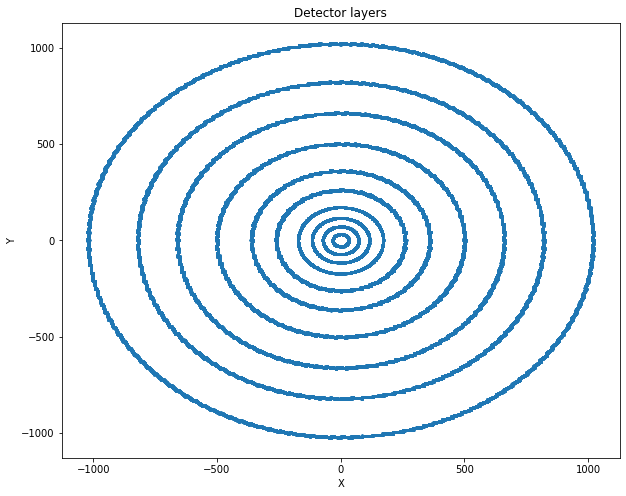

In [27]:
# plotamos todas as camadas en 2D
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(sensor.x, sensor.y, s=3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
#plt.title('Detector layers(5000 tracks ~ 49900 hits)')
plt.title('Detector layers')
plt.savefig('detector_all_layer.pdf')
fig.show()


In [28]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

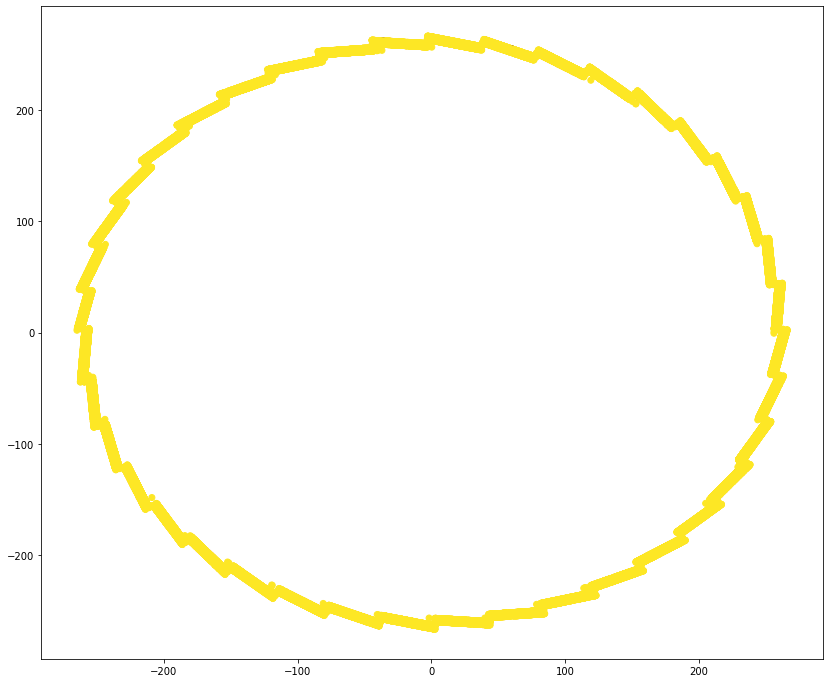

In [29]:
# plotamos so uma camada
fig, ax = plt.subplots(figsize=(14,12))
ax.scatter(dataset.x, dataset.y,marker='o', c=labels)
fig.show()

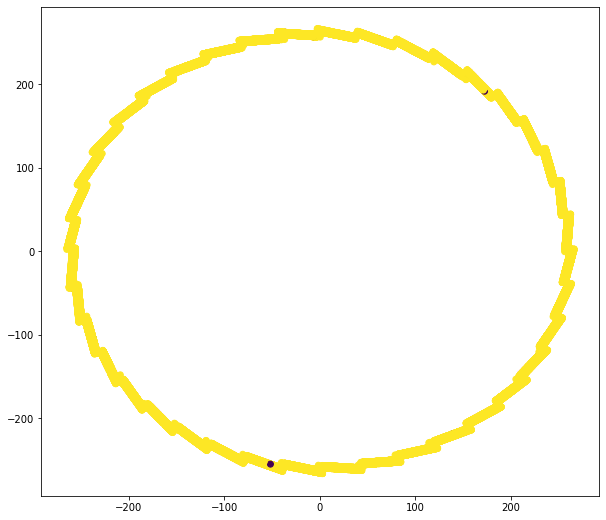

In [32]:
# plotamos so uma camada
fig, ax = plt.subplots(figsize=(10,9))
ax.scatter(layer_5.x, layer_5.y, c=cores)
fig.show()

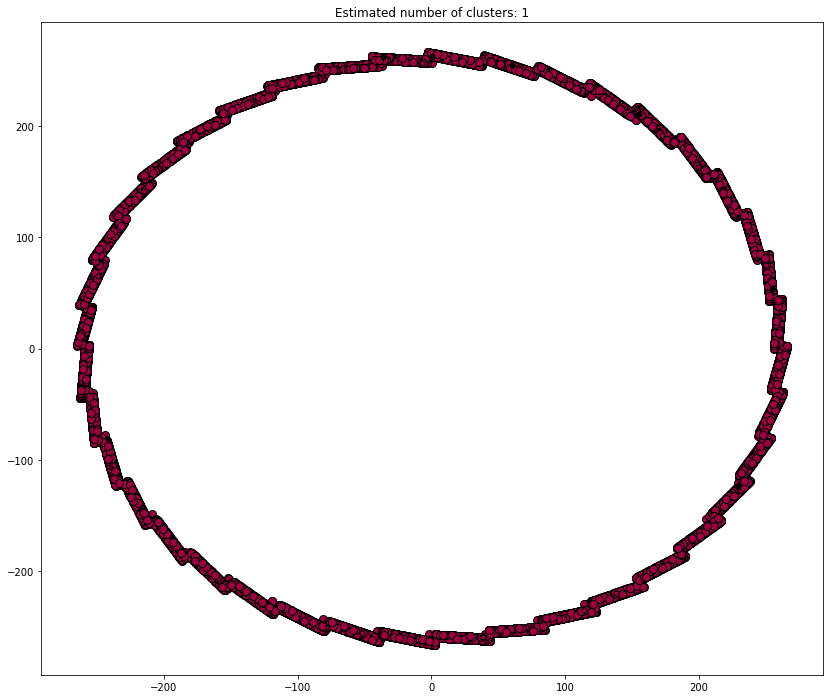

In [33]:
# Plotamos os cluster de acordo a configurção
X = layer_5
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig, ax = plt.subplots(figsize=(14,12))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    # all classes
    class_member_mask = (labels == k)

    xy = X[class_member_mask & cores]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k',
             markersize=8)

    xy = X[class_member_mask & ~cores]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k',
               markersize=5)

plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# plotamos todas as camadas em 3d 
fig = go.Figure(data=[go.Scatter3d(x=sensor.x,
                                   y=sensor.y,
                                   z=sensor.z,
                                   mode='markers',
                                   marker=dict(
                                        size=2.5,
                                        #color=labels,                # set color to an array/list of desired values
                                        colorscale='Jet',   # choose a colorscale
                                        opacity=0.8
                                    )
                                  )])


#fig.show()
fig.write_html('sensor_labels.html', auto_open=True)  

In [62]:
#res = (==5)
#print(len(res))
#print(len(labels))
unique_labels



{-1, 0, 1}

In [59]:
#for each in np.linspace(0, 1, len(unique_labels)):
for each in range(0, len(unique_labels)):
    print(each)
    #colors = matplotlib.colors.colorConverter.to_rgb(plt.cm.Spectral(each))
    colors = 'rgb'+str(colors)
    print(colors)

colors = plt.cm.Spectral(unique_labels / n_clusters)
colors
#print(colors)

0
rgbrgbrgbrgbrgb(0.3686274509803922, 0.30980392156862746, 0.6352941176470588)
1
rgbrgbrgbrgbrgbrgb(0.3686274509803922, 0.30980392156862746, 0.6352941176470588)
2
rgbrgbrgbrgbrgbrgbrgb(0.3686274509803922, 0.30980392156862746, 0.6352941176470588)


TypeError: unsupported operand type(s) for /: 'set' and 'int'

In [91]:
# graficamos so por camada
import matplotlib.pyplot as plt
colors  =[]

#matplotlib.colors.colorConverter.to_rgb()
for color in np.linspace(1, 255, len(unique_labels)):
#for each in len(unique_labels):
    #colors = matplotlib.colors.colorConverter.to_rgb(plt.cm.Spectral(each))
    #colors = matplotlib.colors.colorConverter.to_rgb(plt.cm.Spectral(each/n_clusters))
    #print(each)
    #colors = matplotlib.colors.colorConverter.to_rgb(each, alpha=0.5)
    #colors = matplotlib.colors.ColorConverter().to_rgba(50.0)
    colors = plt.cm.Spectral(color/n_clusters)
    colors = 'rgb'+str(colors)
    print(colors)
    cmap = matplotlib.cm.get_cmap('Spectral')
    colors = 'rgb' + str(cmap(color))
    print(colors)

rgb(0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0)
rgb(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)
rgb(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)
rgb(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)
rgb(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)
rgb(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)


In [84]:
# return colors entre
#np.linspace(1, 255, len(unique_labels))
#plt.cm.Spectral(50)
cmap = matplotlib.cm.get_cmap('Spectral')
#color = 'rgb' + str(cmap(norm(values_dict[i]))[0:3])
color = 'rgb' + str(cmap(230))
print(color)
norm = matplotlib.colors.Normalize()
norm

rgb(0.19946174548250672, 0.5289504036908881, 0.7391003460207612, 1.0)


In [96]:
    
X = layer_5_

unique_labels = set(labels)


clusters = []
colors = ['rgb(200,100,200)', 'rgb(20,10,20)', 'rgb(40,50,250)']

for k, col in zip(unique_labels, colors):
    print(col)
    print(tuple(col))
    if k == -1:
        # Black used for noise.
        #col = [0, 0, 0, 1]
        col = [1.0, 'rgb(0,0,255)']

    # all classes
    class_member_mask = (labels == k)

    xy = X[class_member_mask & cores]
  
    cluster = go.Scatter3d(x=xy.iloc[:, 0],
                           y=xy.iloc[:, 1],
                           z=xy.iloc[:, 2],
                           mode='markers',
                           marker=dict(
                                size=3,
                                color=col,       # set color to an array/list of desired values
                                #olorscale=col,   # choose a colorscale
                                opacity=0.8 
                            )
                          )
    
    clusters.append(cluster)

    xy = X[class_member_mask & ~cores]

    cluster = go.Scatter3d(x=xy.iloc[:, 0],
                           y=xy.iloc[:, 1],
                           z=xy.iloc[:, 2],
                           mode='markers',
                           marker=dict(
                                size=2,
                                color=col,       # set color to an array/list of desired values
                                #colorscale=tuple(col),   # choose a colorscale
                                opacity=1 
                            )
                          )
    clusters.append(cluster)
    
fig = go.Figure(data = clusters)

fig.write_html('sensor_labels.html', auto_open=False)
fig.show()
 

rgb(200,100,200)
('r', 'g', 'b', '(', '2', '0', '0', ',', '1', '0', '0', ',', '2', '0', '0', ')')
rgb(20,10,20)
('r', 'g', 'b', '(', '2', '0', ',', '1', '0', ',', '2', '0', ')')
rgb(40,50,250)
('r', 'g', 'b', '(', '4', '0', ',', '5', '0', ',', '2', '5', '0', ')')


In [ ]:

fig = go.Figure(data=[go.Scatter3d(x=layer_5_.x,
                                   y=layer_5_.y,
                                   z=layer_5_.z,
                                   mode='markers',
                                   marker=dict(
                                        size=2,
                                        color=cores,
                                        # set color to an array/list of desired values
                                        #color='smoker',   # choose a colorscale
                                        colorscale='Jet',
                                        #showscale=True,
                                        #opacity=0.8
                                        #colorscale = [
                                        #    [0., 'rgba(0,0,0, 1)'],
                                        #    [1., 'rgba(255, 225, 255, 1)']]                                       
                                    )
                                  )])


#fig.show()
#fig.write_html('layer_labels.html', auto_open=True)  
fig.write_html('layer_cores.html', auto_open=True)  

In [ ]:

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)for each in np.linspace(0, 1, len(unique_labels))]

fig = go.Figure(data=[go.Scatter3d(x=layer_5_.x,
                                   y=layer_5_.y,
                                   z=layer_5_.z,
                                   mode='markers',
                                   marker=dict(
                                        size=2,
                                        color=labels,
                                        colorscale='Jet',
                                    
                                    )
                                  )])


#fig.show()
#fig.write_html('layer_labels.html', auto_open=True)  
fig.write_html('layer_labels.html', auto_open=True)  

In [ ]:
fig, ax = plt.subplots(figsize=(24,18))
ax.scatter(layer_5.x, layer_5.y , c=sample_cores)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('Outlier Detection')
fig.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=sample_cores )
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('Outlier Detection')
fig.show()